In [3]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [5]:
from xgboost import XGBRegressor
#import lightgbm as lgb

In [6]:
df = pd.read_excel("marriage_numbers.xlsx")

In [7]:
X = df[['marriage_couples', 'female_marriage_age','male_marriage_age']]

In [8]:
y = df[['total_birth_numbers']]
y

,total_birth_numbers
0,423356
1,414069
2,309230
3,321932
4,325613
5,325545
6,260354
7,204459
8,204414
9,198733


# Train test split

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1, random_state=10)

In [28]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((20, 3), (3, 3), (20, 1), (3, 1))

In [29]:
RF_model = RandomForestRegressor(random_state =5, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)

## The number of marriages is not the main reason for the low fertility rate. In order to save the crisis, finding out the reason behind the increasing marriage age should be the top priority.

                     importance
feature                        
male_marriage_age          0.50
female_marriage_age        0.42
marriage_couples           0.08


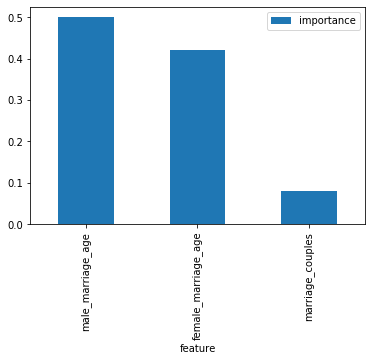

In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

In [31]:
def model_feature(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:{}'.format(round(r2_score(y_test , y_pred) , 2)))
    print('MAE',round(mean_absolute_error(y_test , y_pred) , 2))
    # print('MAPE' , round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    print('MSE' , round(mean_squared_error(y_test , y_pred) , 2))

In [ ]:
#conda install -c conda-forge lightgbm

In [32]:
model_list = [LinearRegression() ,XGBRegressor() , Ridge() , Lasso() ,
              DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
model_list1 = []
R2_score = []
mae = []
score = []
mse = []
for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [33]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df

,Model,R2_score,MAE,MSE
6,"GradientBoostingRegressor(alpha=0.9, criterion...",0.98,10662.21,1.297058e+08
4,"DecisionTreeRegressor(criterion='mse', max_dep...",0.97,11459.00,2.374512e+08
1,"XGBRegressor(base_score=None, booster=None, ca...",0.81,29986.21,1.407781e+09
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.69,46630.01,2.258374e+09
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.67,47894.30,2.406884e+09
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.67,47895.22,2.406973e+09
5,"RandomForestRegressor(bootstrap=True, criterio...",0.55,52651.13,3.349636e+09


# Try five features

In [34]:
X1 = df[['marriage_couples', 'female_marriage_age','male_marriage_age','m_20to49_MarriageRate', 'f_20to49_MarriageRate']]
y = df[['total_birth_numbers']]

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X1 , y , test_size = 0.1, random_state=10)

In [36]:
RF_model = RandomForestRegressor(random_state =5, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)

                       importance
feature                          
f_20to49_MarriageRate       0.256
m_20to49_MarriageRate       0.250
male_marriage_age           0.239
female_marriage_age         0.192
marriage_couples            0.063


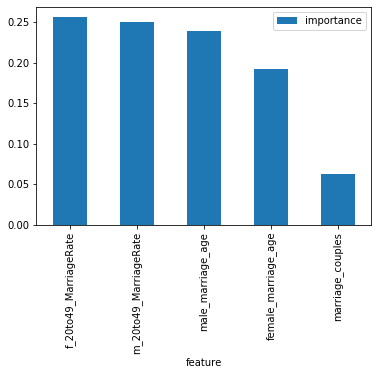

In [37]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar()

In [38]:
#KNeighborsRegressor()
model_list = [LinearRegression() ,XGBRegressor() , Ridge() , Lasso() ,
              DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
model_list1 = []
R2_score = []
mae = []
score = []
mse = []
for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [39]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df

,Model,R2_score,MAE,MSE
6,"GradientBoostingRegressor(alpha=0.9, criterion...",0.98,10922.95,1.409720e+08
4,"DecisionTreeRegressor(criterion='mse', max_dep...",0.97,12640.67,2.418009e+08
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.92,17064.41,5.588602e+08
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.88,17963.89,9.025419e+08
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.88,17960.54,9.022141e+08
5,"RandomForestRegressor(bootstrap=True, criterio...",0.83,30355.60,1.270536e+09
1,"XGBRegressor(base_score=None, booster=None, ca...",0.81,29862.42,1.409151e+09


## With two critical features, we can see the R2 score enhanced magnificently. Now, all regression algorithms can reach an R2 score of 0.8.